## Introduction to R & Data Wrangling

#### [R Programming Basics](https://academy.dqlab.id/main/livecode/378/870/4864?pr=0)

In [1]:
nama <- c("Bayu", "Robert", "Budi", "Rina")
transaksi_terakhir <- c("2019-01-02", "2020-11-23", "2017-04-02", "2010-02-03")
umur <- c(20, 29, 18, 27)
segment = c("Low", "High", "High", "Medium")
active_customer = c(TRUE, TRUE, FALSE, TRUE)

#### [Data Structure dan Class #1](https://academy.dqlab.id/main/livecode/378/870/4865?pr=0)

In [2]:
customers <- data.frame(
  nama = c("Bayu", "Robert", "Budi", "Rina"),
  transaksi_terakhir = as.Date(c("2019-01-02","2020-11-23","2017-04-02","2010-02-03")),
  umur = c(20,29,18,27),
  segment = as.factor(c("Low", "High", "High", "Medium")),
  active_customer = c(TRUE, TRUE, FALSE, TRUE)
    )
    
customers

nama,transaksi_terakhir,umur,segment,active_customer
<chr>,<date>,<dbl>,<fct>,<lgl>
Bayu,2019-01-02,20,Low,TRUE
Robert,2020-11-23,29,High,TRUE
Budi,2017-04-02,18,High,FALSE
Rina,2010-02-03,27,Medium,TRUE


#### [Data Structure dan Class #2](https://academy.dqlab.id/main/livecode/378/870/4866?pr=0)

In [3]:
class(customers$umur)

[1] "numeric"

In [4]:
str(customers)

'data.frame':	4 obs. of  5 variables:
 $ nama              : chr  "Bayu" "Robert" "Budi" "Rina"
 $ transaksi_terakhir: Date, format: "2019-01-02" "2020-11-23" ...
 $ umur              : num  20 29 18 27
 $ segment           : Factor w/ 3 levels "High","Low","Medium": 2 1 1 3
 $ active_customer   : logi  TRUE TRUE FALSE TRUE


#### [Data Wrangling](https://academy.dqlab.id/main/livecode/378/870/4867?pr=0)

In [5]:
library(tidyverse)
library(dplyr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
data_pizza <- read_csv('https://storage.googleapis.com/dqlab-dataset/pizza_v1.csv')

data_pizza %>% 
  select(variant, size, extra_sauce, extra_cheese, topping, diameter, price_rupiah) %>% 
  head()

Rows: 129 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): company, price_rupiah, topping, variant, size, extra_sauce, extra_c...
dbl (1): diameter

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


variant,size,extra_sauce,extra_cheese,topping,diameter,price_rupiah
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
double_signature,jumbo,yes,yes,chicken,22.0,"Rp235,000"
double_signature,jumbo,yes,yes,papperoni,20.0,"Rp198,000"
double_signature,reguler,yes,yes,mushrooms,16.0,"Rp120,000"
double_signature,reguler,yes,no,smoked beef,14.0,"Rp155,000"
double_signature,jumbo,yes,no,mozzarella,18.0,"Rp248,000"
american_favorite,jumbo,no,no,black papper,18.5,"Rp140,000"


#### [Filtering](https://academy.dqlab.id/main/livecode/378/870/4868?pr=0)

In [7]:
data_pizza %>% 
  filter(size == 'jumbo') %>% 
  select(size, topping, price_rupiah) %>% 
  head()

size,topping,price_rupiah
<chr>,<chr>,<chr>
jumbo,chicken,"Rp235,000"
jumbo,papperoni,"Rp198,000"
jumbo,mozzarella,"Rp248,000"
jumbo,black papper,"Rp140,000"
jumbo,smoked beef,"Rp110,000"
jumbo,mozzarella,"Rp140,000"


#### [Mutate](https://academy.dqlab.id/main/livecode/378/870/4869?pr=0)

In [8]:
data_pizza %>% 
  filter(size == 'jumbo') %>% 
  select(size, topping, price_rupiah) %>% 
  mutate(topping = toupper(topping),
         size = toupper(size)) %>% 
  head()

size,topping,price_rupiah
<chr>,<chr>,<chr>
JUMBO,CHICKEN,"Rp235,000"
JUMBO,PAPPERONI,"Rp198,000"
JUMBO,MOZZARELLA,"Rp248,000"
JUMBO,BLACK PAPPER,"Rp140,000"
JUMBO,SMOKED BEEF,"Rp110,000"
JUMBO,MOZZARELLA,"Rp140,000"


#### [Agregasi dengan Count](https://academy.dqlab.id/main/livecode/378/870/4870?pr=0)

In [9]:
data_pizza %>% 
  select(size, variant, topping) %>% 
  filter((size == 'reguler') & (variant == 'american_favorite')) %>% 
  mutate(topping = toupper(topping)) %>% 
  count(topping)

topping,n
<chr>,<int>
MUSHROOMS,1
PAPPERONI,1
SMOKED BEEF,1


#### [Group dan Agregasi](https://academy.dqlab.id/main/livecode/378/870/4871?pr=0)

In [10]:
data_pizza %>% 
  filter(size == 'jumbo') %>% 
  select(size, topping, diameter) %>% 
  group_by(size, topping) %>% 
  summarise(total_diameter = sum(diameter),
            rata_rata_diameter = mean(diameter),
            total = length(diameter))

`summarise()` has grouped output by 'size'. You can override using the
`.groups` argument.


size,topping,total_diameter,rata_rata_diameter,total
<chr>,<chr>,<dbl>,<dbl>,<int>
jumbo,black papper,34.5,17.250,2
jumbo,chicken,66.0,22.000,3
jumbo,mozzarella,73.5,18.375,4
jumbo,mushrooms,37.0,18.500,2
jumbo,papperoni,20.0,20.000,1
jumbo,smoked beef,48.0,16.000,3


## Data Visualization

#### [Pendahuluan](https://academy.dqlab.id/main/livecode/378/871/4872?pr=0)

In [12]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
install.packages("scales")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
install.packages("treemap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘gridBase’, ‘igraph’, ‘shiny’




In [15]:
library(lubridate) # melakukan manipulasi pada data waktu
library(tidyverse) # pengolahan data (export,import dan pemodelan data)
library(dplyr) # untuk melakukan data manipulasi menggunakan pipe
library(zoo) # melakukan perhitungan yang berdasarkan deret waktu
library(ggplot2) # aesthetic visualization
library(scales) # untuk mengatur scaling pada data numbering 
library(glue) # memasukan argument string 
library(treemap)
library(gridBase)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




#### [Load Dataset](https://academy.dqlab.id/main/livecode/378/871/4873?pr=0)

In [16]:
df_transaksi <- read_csv("https://storage.googleapis.com/dqlab-dataset/data_sample.csv")

df_transaksi <- df_transaksi %>% 
  mutate(trx_date = as.Date(trx_date),
         buyer_province = as.factor(buyer_province),
         buyer_postcode = as.factor(buyer_postcode),
         item_code = as.factor(item_code),
         product_group = as.factor(product_group))

glimpse(df_transaksi)

Rows: 980 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): buyer_province, item_code, product_group
dbl  (5): customer_code, order_no, buyer_postcode, qty_order, amount
dttm (1): trx_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 980
Columns: 9
$ customer_code  <dbl> 1131501516, 1131500945, 1131505713, 1131504138, 1131500…
$ trx_date       <date> 2020-08-25, 2020-05-29, 2020-08-02, 2020-06-18, 2020-0…
$ order_no       <dbl> 4978487, 4157084, 4777299, 4345679, 5007798, 3678661, 4…
$ buyer_province <fct> Banten, Kalimantan Barat, DKI Jakarta, DKI Jakarta, Jaw…
$ buyer_postcode <fct> 15810, 78112, 12150, 14470, 40221, 33351, 15570, 10520,…
$ item_code      <fct> AKA9X95003, AKB9J24, AKB9H98, AKB9J01, AKA0B02003, AKB9…
$ qty_order      <dbl> 2, 5, 4, 4, 1, 3, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ amount         <dbl> 96136.36, 96136.35, 95563.64, 95418.20, 94618.18, 93818…
$ product_group  <fct> Hair Oil, Hair Oil, Oil Aromatic, Oil Aromatic, Gel Ant…


#### [Plotting in R: Boxplot](https://academy.dqlab.id/main/livecode/378/871/4874?pr=0)

In [17]:
df_average <- df_transaksi %>% 
  group_by(trx_date) %>% 
  summarise(total_amount = sum(amount),
            total_transaksi = length(trx_date)) %>% 
  mutate(rata_rata_amount = total_amount/total_transaksi,
         month = month(trx_date))
         


In [18]:
df_average

trx_date,total_amount,total_transaksi,rata_rata_amount,month
<date>,<dbl>,<int>,<dbl>,<dbl>
2020-02-19,48545.46,1,48545.46,2
2020-02-20,176818.19,3,58939.40,2
2020-02-24,27818.18,1,27818.18,2
2020-03-01,21363.64,1,21363.64,3
2020-03-02,11818.18,1,11818.18,3
2020-03-03,29709.09,1,29709.09,3
2020-03-04,19418.18,1,19418.18,3
2020-03-06,164918.18,3,54972.73,3
2020-03-07,13909.09,1,13909.09,3


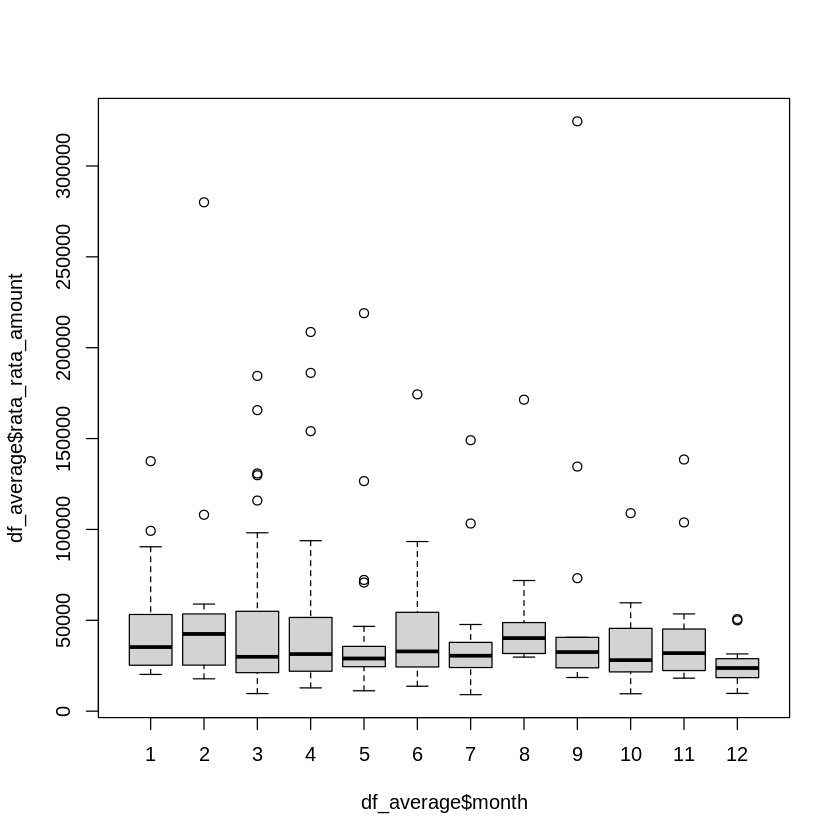

In [19]:
boxplot(df_average$rata_rata_amount ~ df_average$month)

#### [Plotting in R: Barplot](https://academy.dqlab.id/main/livecode/378/871/4876?pr=0)

In [20]:
df_outlier <- df_transaksi %>% 
  group_by(trx_date) %>% 
  summarise(total_amount = sum(amount),
            total_transaksi = length(trx_date)) %>% 
  mutate(rata_rata_amount = total_amount/total_transaksi,
         month = month(trx_date)) %>% 
  filter(month == 3)

In [21]:
df_outlier

trx_date,total_amount,total_transaksi,rata_rata_amount,month
<date>,<dbl>,<int>,<dbl>,<dbl>
2020-03-01,21363.64,1,21363.64,3
2020-03-02,11818.18,1,11818.18,3
2020-03-03,29709.09,1,29709.09,3
2020-03-04,19418.18,1,19418.18,3
2020-03-06,164918.18,3,54972.73,3
2020-03-07,13909.09,1,13909.09,3
2020-03-08,129818.19,1,129818.19,3
2020-03-09,184472.72,1,184472.72,3
2020-03-11,115477.27,3,38492.42,3


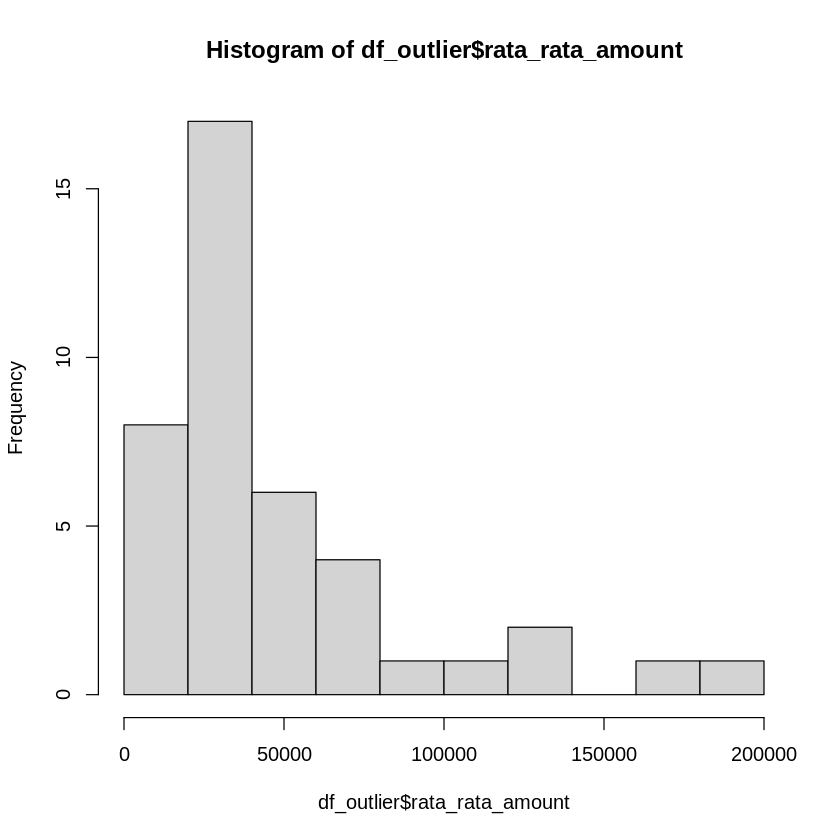

In [22]:
hist(df_outlier$rata_rata_amount)

#### [Plotting in R: Scatter Plot](https://academy.dqlab.id/main/livecode/378/871/4875?pr=0)

In [23]:
df_scatter <- df_transaksi %>% 
  group_by(product_group, trx_date) %>% 
  summarise(total_amount = sum(amount),
            total_transaksi = length(trx_date))

`summarise()` has grouped output by 'product_group'. You can override using the
`.groups` argument.


In [24]:
df_scatter

product_group,trx_date,total_amount,total_transaksi
<fct>,<date>,<dbl>,<int>
Body Care,2020-04-02,25654.54,1
Body Care,2020-04-07,12827.27,1
Body Care,2020-04-17,36363.64,2
Body Care,2020-05-25,22636.36,1
Body Care,2020-05-31,20409.09,2
Body Care,2020-06-03,12827.27,1
Body Care,2020-06-12,12827.27,1
Body Care,2020-06-15,9759.00,1
Body Care,2020-07-08,64136.35,1


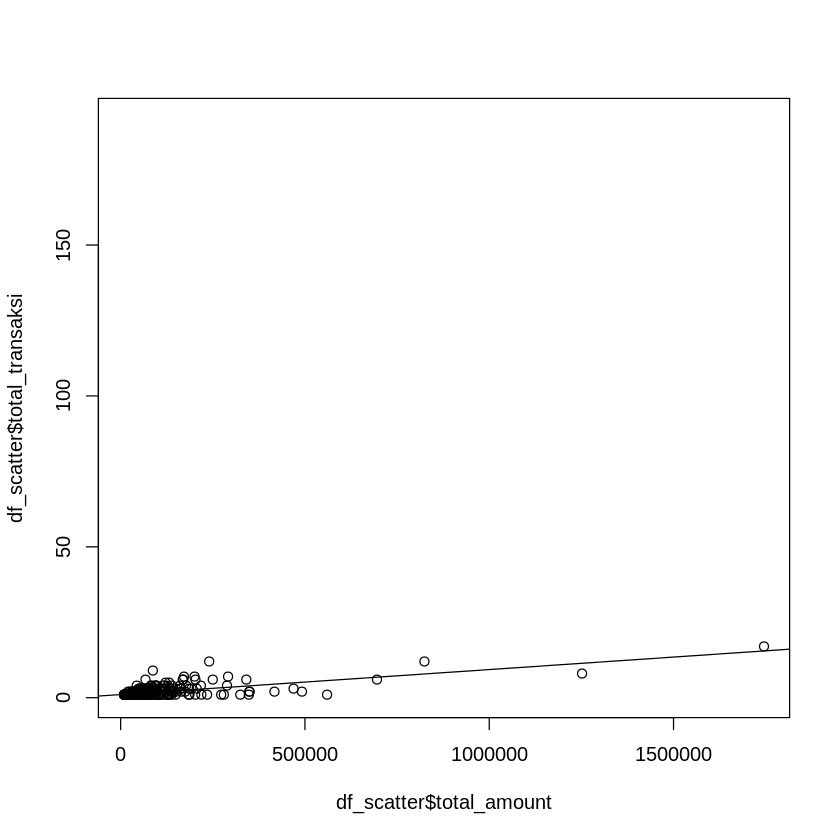

In [25]:
plot(x = df_scatter$total_amount, df_scatter$total_transaksi)
abline(lm(total_transaksi ~ total_amount, data = df_scatter))

#### [Bar Chart - 1](https://academy.dqlab.id/main/livecode/378/871/4878?pr=0)

In [26]:
df_transaksi <- df_transaksi %>% drop_na()

In [27]:
buyer_amount <- df_transaksi %>% 
  group_by(buyer_province) %>% 
  summarise(total_amount = sum(amount))

In [28]:
buyer_amount

buyer_province,total_amount
<fct>,<dbl>
Aceh,49863.64
Bali,223804.56
Bangka Belitung,167009.10
Banten,8858274.94
Bengkulu,30506.37
DKI Jakarta,25101362.03
Jambi,324545.48
Jawa Barat,13450920.36
Jawa Tengah,1523395.54


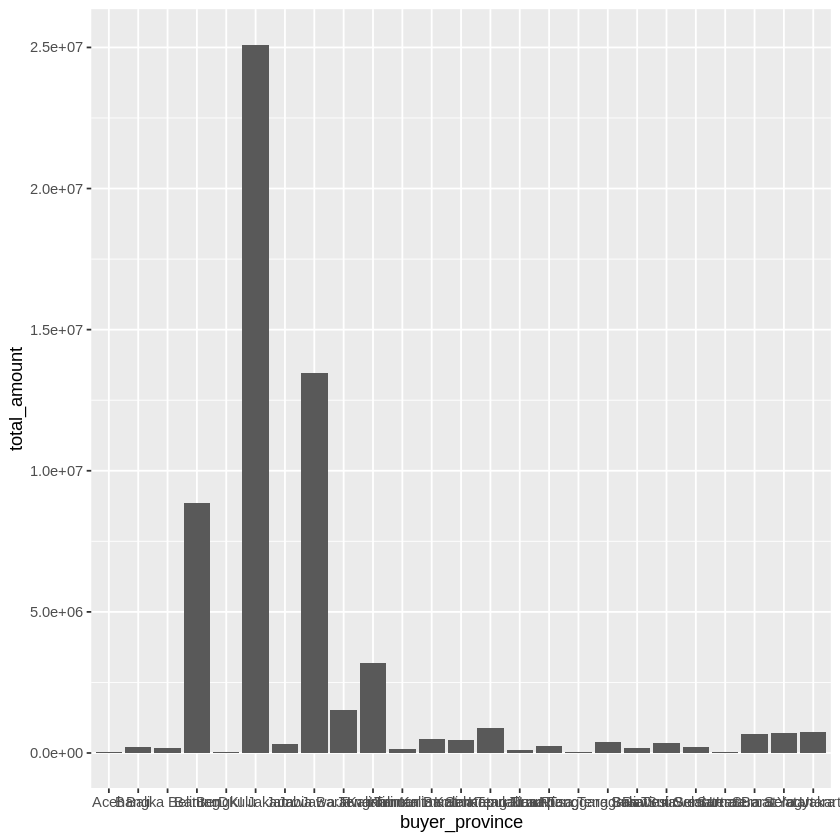

In [29]:
ggplot(buyer_amount, aes(x = buyer_province, y = total_amount)) +
  geom_col()

#### [Bar Chart - 2](https://academy.dqlab.id/main/livecode/378/871/4879?pr=0)

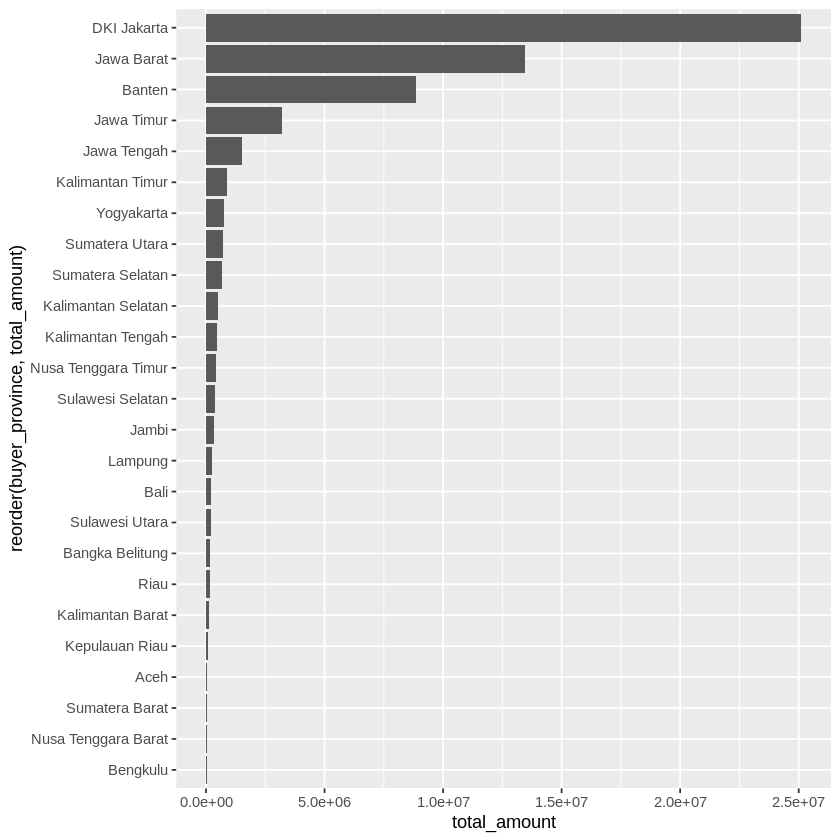

In [30]:
ggplot(buyer_amount, aes(x = total_amount, reorder(buyer_province, total_amount))) +
  geom_col()

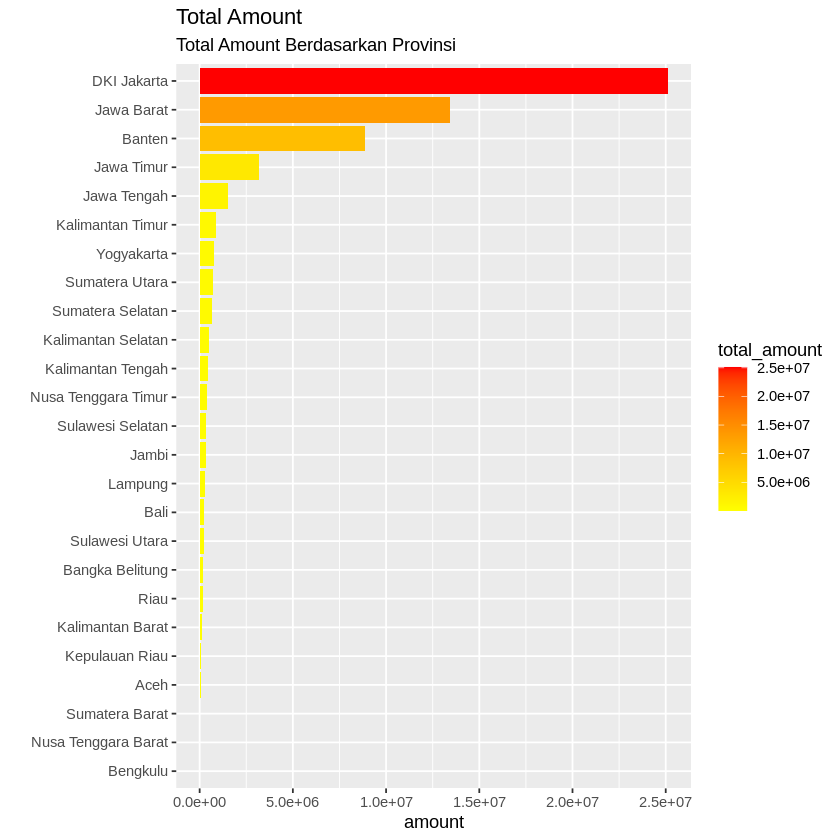

In [31]:
ggplot(buyer_amount, aes(x = total_amount, y =  reorder(buyer_province, total_amount))) +
  geom_col(aes(fill = total_amount)) +
  scale_fill_gradient(low = "yellow", high = "red") +
  labs(title = "Total Amount",
       subtitle = "Total Amount Berdasarkan Provinsi",
       x = "amount",
       y = "")

#### [Bar Chart - 3](https://academy.dqlab.id/main/livecode/378/871/4882?pr=0)

In [32]:
df_oil <- df_transaksi %>% 
  group_by(buyer_province, product_group) %>% 
  summarise(qty_order = sum(qty_order)) %>%
  filter(product_group == "Oil Aromatic")

`summarise()` has grouped output by 'buyer_province'. You can override using
the `.groups` argument.


In [33]:
df_oil

buyer_province,product_group,qty_order
<fct>,<fct>,<dbl>
Aceh,Oil Aromatic,2
Bali,Oil Aromatic,1
Bangka Belitung,Oil Aromatic,4
Banten,Oil Aromatic,70
DKI Jakarta,Oil Aromatic,177
Jawa Barat,Oil Aromatic,93
Jawa Tengah,Oil Aromatic,6
Jawa Timur,Oil Aromatic,10
Kalimantan Barat,Oil Aromatic,2


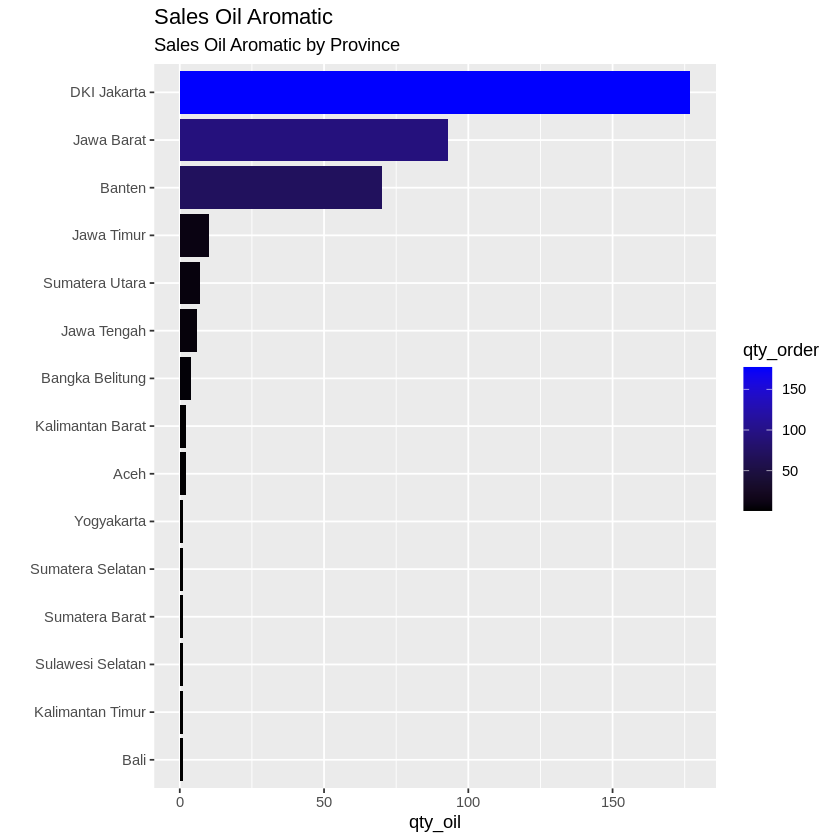

In [34]:
ggplot(df_oil, aes(x = qty_order, y =  reorder(buyer_province, qty_order)))+
  geom_col(aes(fill = qty_order))+
  scale_fill_gradient(low = "black",high = "blue") +
  labs(title = "Sales Oil Aromatic",
       subtitle = "Sales Oil Aromatic by Province",
       x = "qty_oil",
       y = "")

#### [Line Chart](https://academy.dqlab.id/main/livecode/378/871/4880?pr=0)

In [35]:
customer <- df_transaksi %>% 
  select(trx_date, customer_code) %>% 
  mutate(yearmonth = format(trx_date, format="%Y-%m-1"),
         yearmonth = ymd(yearmonth)) %>% 
  select(customer_code,yearmonth) %>% 
  distinct() %>% 
  group_by(yearmonth) %>% 
  summarise(total_customer = n())

In [36]:
customer

yearmonth,total_customer
<date>,<int>
2020-02-01,5
2020-03-01,212
2020-04-01,47
2020-05-01,84
2020-06-01,68
2020-07-01,25
2020-08-01,113
2020-09-01,25
2020-10-01,24


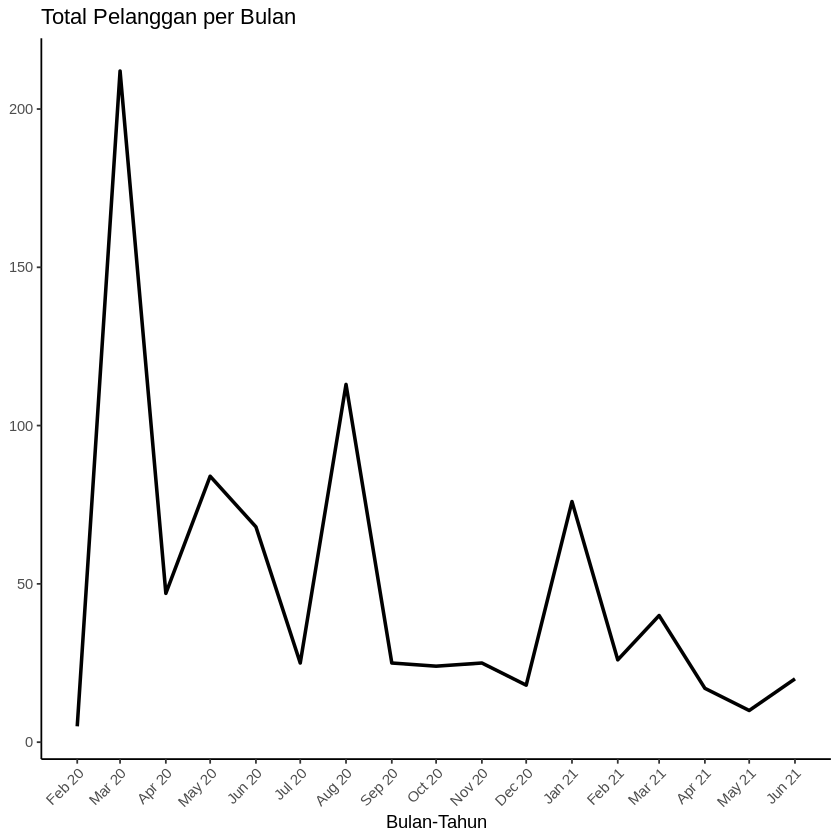

In [37]:
ggplot(data=customer, aes(x=yearmonth, y=total_customer))+
  geom_line(size=1)+
  labs(
    title = "Total Pelanggan per Bulan",
    x = "Bulan-Tahun",
    y = NULL
  )+
    scale_x_date(breaks=date_breaks('1 months'),
     labels=date_format('%b %y'))+
  theme_classic()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#### [Treemap Visualization](https://academy.dqlab.id/main/livecode/378/871/4881?pr=0)

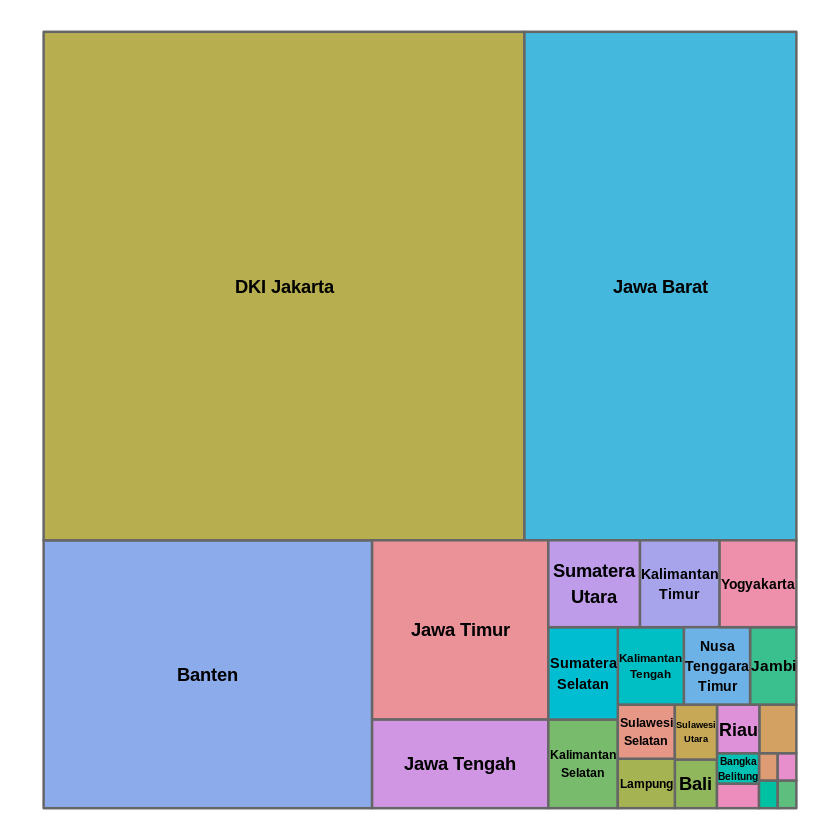

In [38]:
treemap_qty <- treemap(df_transaksi,
        index      = c("buyer_province"),
        vSize      = "qty_order",
        title      = "",
        border.col = "grey40")

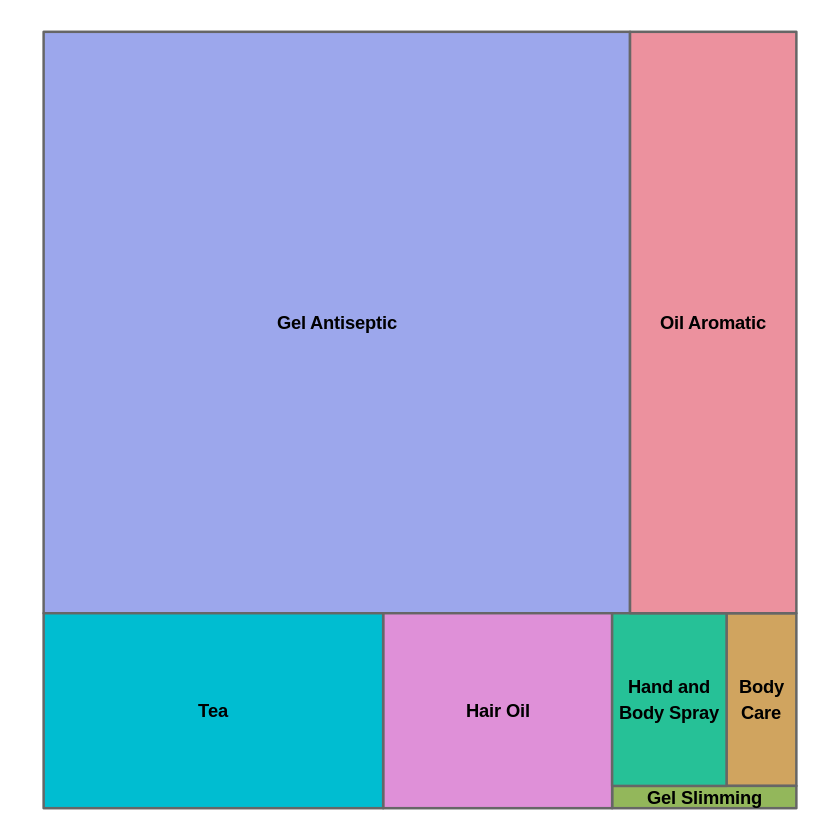

In [39]:
treemap_qty <- treemap(df_transaksi,
        index      = c("product_group"),
        vSize      = "qty_order",
        title      = "",
        border.col = "grey40")

## Unsupervised Machine Learning & RFM

#### [Load Dataset](https://academy.dqlab.id/main/livecode/378/872/4883?pr=0)

In [40]:
df_data <- read_csv("https://storage.googleapis.com/dqlab-dataset/data_sample.csv")

Rows: 980 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): buyer_province, item_code, product_group
dbl  (5): customer_code, order_no, buyer_postcode, qty_order, amount
dttm (1): trx_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [41]:
#check tipe data
glimpse(df_data)

Rows: 980
Columns: 9
$ customer_code  <dbl> 1131501516, 1131500945, 1131505713, 1131504138, 1131500…
$ trx_date       <dttm> 2020-08-25, 2020-05-29, 2020-08-02, 2020-06-18, 2020-0…
$ order_no       <dbl> 4978487, 4157084, 4777299, 4345679, 5007798, 3678661, 4…
$ buyer_province <chr> "Banten", "Kalimantan Barat", "DKI Jakarta", "DKI Jakar…
$ buyer_postcode <dbl> 15810, 78112, 12150, 14470, 40221, 33351, 15570, 10520,…
$ item_code      <chr> "AKA9X95003", "AKB9J24", "AKB9H98", "AKB9J01", "AKA0B02…
$ qty_order      <dbl> 2, 5, 4, 4, 1, 3, 3, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4…
$ amount         <dbl> 96136.36, 96136.35, 95563.64, 95418.20, 94618.18, 93818…
$ product_group  <chr> "Hair Oil", "Hair Oil", "Oil Aromatic", "Oil Aromatic",…


#### [Data Wrangling](https://academy.dqlab.id/main/livecode/378/872/4884?pr=0)

In [42]:
#data wrangling
df_data <- df_data %>% 
  mutate(customer_code = as.factor(customer_code),
         trx_date = ymd(trx_date),
         buyer_province = as.factor(buyer_province),
         product_group = as.factor(product_group))

In [43]:
#check missing value
colSums(is.na(df_data))

customer_code       trx_date       order_no buyer_province buyer_postcode 
             0              0              0              0              0 
     item_code      qty_order         amount  product_group 
             0              0              4              0

In [44]:
#drop missing value
df_data <- df_data %>% 
  drop_na()

In [45]:
#check missing value
colSums(is.na(df_data))

customer_code       trx_date       order_no buyer_province buyer_postcode 
             0              0              0              0              0 
     item_code      qty_order         amount  product_group 
             0              0              0              0

#### [EDA: Analysis RFM (Recency, Frequency, Monetary) - 1](https://academy.dqlab.id/main/livecode/378/872/4885?pr=0)

In [46]:
analysis_date = date(max(df_data$trx_date)) + days(1)

df_data2 <- df_data

In [47]:
analysis_date

[1] "2021-07-01"

In [49]:
head(df_data2)

customer_code,trx_date,order_no,buyer_province,buyer_postcode,item_code,qty_order,amount,product_group
<fct>,<date>,<dbl>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
1131501516,2020-08-25,4978487,Banten,15810,AKA9X95003,2,96136.36,Hair Oil
1131500945,2020-05-29,4157084,Kalimantan Barat,78112,AKB9J24,5,96136.35,Hair Oil
1131505713,2020-08-02,4777299,DKI Jakarta,12150,AKB9H98,4,95563.64,Oil Aromatic
1131504138,2020-06-18,4345679,DKI Jakarta,14470,AKB9J01,4,95418.20,Oil Aromatic
1131500546,2020-08-28,5007798,Jawa Barat,40221,AKA0B02003,1,94618.18,Gel Antiseptic
1131501950,2020-04-15,3678661,Bangka Belitung,33351,AKB9J00,3,93818.19,Oil Aromatic


In [50]:
#first_order, last_order, avg_amount_order, age, recency, monetary
df_feature <- df_data2 %>% 
  group_by(customer_code, buyer_province) %>% 
  summarise(
         first_order = as.Date(min(trx_date)),
         last_order = as.Date(max(trx_date)),
         min_amount_order = min(amount),
         avg_amount_order = median(amount),
         max_amount_order = max(amount),
         age = as.integer(analysis_date-date(first_order)),
         recency = as.integer(analysis_date-date(last_order)),
         monetary = sum(amount)) %>% 
  ungroup()

`summarise()` has grouped output by 'customer_code'. You can override using the
`.groups` argument.


In [52]:
head(df_feature)

customer_code,buyer_province,first_order,last_order,min_amount_order,avg_amount_order,max_amount_order,age,recency,monetary
<fct>,<fct>,<date>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1131500030,Jawa Timur,2020-03-24,2020-03-24,231818.20,231818.20,231818.20,464,464,231818.20
1131500035,Jawa Barat,2021-06-03,2021-06-03,26836.36,26836.36,26836.36,28,28,26836.36
1131500074,Jawa Barat,2020-05-11,2020-05-11,19227.27,19227.27,19227.27,416,416,19227.27
1131500077,Jawa Timur,2020-08-27,2020-08-27,33309.09,33963.63,34618.18,308,308,67927.27
1131500082,Jawa Barat,2021-06-05,2021-06-05,26836.36,26836.36,26836.36,26,26,26836.36
1131500099,DKI Jakarta,2020-03-27,2020-03-27,69545.46,69545.46,69545.46,461,461,69545.46


In [53]:
#Frequency
df_feature <- df_data2 %>%
  select(customer_code, order_no) %>%
  distinct() %>%
  group_by(customer_code) %>%
  summarise(frequency = n()) %>%
  ungroup() %>%
  left_join(df_feature,by=c("customer_code"))

In [55]:
head(df_feature)

customer_code,frequency,buyer_province,first_order,last_order,min_amount_order,avg_amount_order,max_amount_order,age,recency,monetary
<fct>,<int>,<fct>,<date>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1131500030,1,Jawa Timur,2020-03-24,2020-03-24,231818.20,231818.20,231818.20,464,464,231818.20
1131500035,1,Jawa Barat,2021-06-03,2021-06-03,26836.36,26836.36,26836.36,28,28,26836.36
1131500074,1,Jawa Barat,2020-05-11,2020-05-11,19227.27,19227.27,19227.27,416,416,19227.27
1131500077,1,Jawa Timur,2020-08-27,2020-08-27,33309.09,33963.63,34618.18,308,308,67927.27
1131500082,1,Jawa Barat,2021-06-05,2021-06-05,26836.36,26836.36,26836.36,26,26,26836.36
1131500099,1,DKI Jakarta,2020-03-27,2020-03-27,69545.46,69545.46,69545.46,461,461,69545.46


#### [EDA: Analysis RFM (Recency, Frequency, Monetary) - 2](https://academy.dqlab.id/main/livecode/378/872/4896?pr=0)

In [56]:
df_feature <- df_data2 %>%
  group_by(customer_code, order_no) %>%
  summarise(freq = n()) %>%
  ungroup() %>%
  group_by(customer_code) %>%
  summarise(
    min_baskets = min(freq),
    max_baskets = max(freq),
    avg_baskets = round(median(freq),0)) %>%
  ungroup() %>%
  left_join(df_feature, by = c("customer_code"))

`summarise()` has grouped output by 'customer_code'. You can override using the
`.groups` argument.


In [57]:
head(df_feature)

customer_code,min_baskets,max_baskets,avg_baskets,frequency,buyer_province,first_order,last_order,min_amount_order,avg_amount_order,max_amount_order,age,recency,monetary
<fct>,<int>,<int>,<dbl>,<int>,<fct>,<date>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1131500030,1,1,1,1,Jawa Timur,2020-03-24,2020-03-24,231818.20,231818.20,231818.20,464,464,231818.20
1131500035,1,1,1,1,Jawa Barat,2021-06-03,2021-06-03,26836.36,26836.36,26836.36,28,28,26836.36
1131500074,1,1,1,1,Jawa Barat,2020-05-11,2020-05-11,19227.27,19227.27,19227.27,416,416,19227.27
1131500077,2,2,2,1,Jawa Timur,2020-08-27,2020-08-27,33309.09,33963.63,34618.18,308,308,67927.27
1131500082,1,1,1,1,Jawa Barat,2021-06-05,2021-06-05,26836.36,26836.36,26836.36,26,26,26836.36
1131500099,1,1,1,1,DKI Jakarta,2020-03-27,2020-03-27,69545.46,69545.46,69545.46,461,461,69545.46


#### [Recency](https://academy.dqlab.id/main/livecode/378/872/4886?pr=0)

In [58]:
#membuat kolom baru dengan melakukan segment recency customer berdasarkan nilai dari kolom recency
recency_adjust <- data.frame(
  active = 30,
  warm = 90,
  cold = 180,
  inactive = Inf
)

In [59]:
recency_adjust

active,warm,cold,inactive
<dbl>,<dbl>,<dbl>,<dbl>
30,90,180,Inf


In [60]:
df_feature <- df_feature %>% mutate(
  recency_segment = case_when(recency <= recency_adjust$active ~ "active",
                              recency > recency_adjust$active & recency <= recency_adjust$warm ~ "warm",
                              recency > recency_adjust$warm & recency <= recency_adjust$cold ~ "cold",
                              TRUE ~ "inactive"),
  recency_segment = factor(recency_segment, levels=c(names(recency_adjust)))
)

In [61]:
head(df_feature)

customer_code,min_baskets,max_baskets,avg_baskets,frequency,buyer_province,first_order,last_order,min_amount_order,avg_amount_order,max_amount_order,age,recency,monetary,recency_segment
<fct>,<int>,<int>,<dbl>,<int>,<fct>,<date>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<fct>
1131500030,1,1,1,1,Jawa Timur,2020-03-24,2020-03-24,231818.20,231818.20,231818.20,464,464,231818.20,inactive
1131500035,1,1,1,1,Jawa Barat,2021-06-03,2021-06-03,26836.36,26836.36,26836.36,28,28,26836.36,active
1131500074,1,1,1,1,Jawa Barat,2020-05-11,2020-05-11,19227.27,19227.27,19227.27,416,416,19227.27,inactive
1131500077,2,2,2,1,Jawa Timur,2020-08-27,2020-08-27,33309.09,33963.63,34618.18,308,308,67927.27,inactive
1131500082,1,1,1,1,Jawa Barat,2021-06-05,2021-06-05,26836.36,26836.36,26836.36,26,26,26836.36,active
1131500099,1,1,1,1,DKI Jakarta,2020-03-27,2020-03-27,69545.46,69545.46,69545.46,461,461,69545.46,inactive


#### [Data Normalization](https://academy.dqlab.id/main/livecode/378/872/4887?pr=0)

In [62]:
norm_minmax <- function(x){
  return ((x - min(x))/(max(x) - min(x)))
}

In [63]:
df_feature$mm_frequency <- norm_minmax(df_feature$frequency)
df_feature$mm_monetary <- norm_minmax(df_feature$monetary)

In [64]:
df_elbow <- df_feature %>% 
  select(customer_code,mm_frequency,mm_monetary)

In [68]:
head(df_elbow)

customer_code,mm_frequency,mm_monetary
<fct>,<dbl>,<dbl>
1131500030,0,0.28223856
1131500035,0,0.02248692
1131500074,0,0.01284473
1131500077,0,0.07455705
1131500082,0,0.02248692
1131500099,0,0.07660761


#### [Mencari nilai K Optimum](https://academy.dqlab.id/main/livecode/378/872/4888?pr=0)

In [71]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [72]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



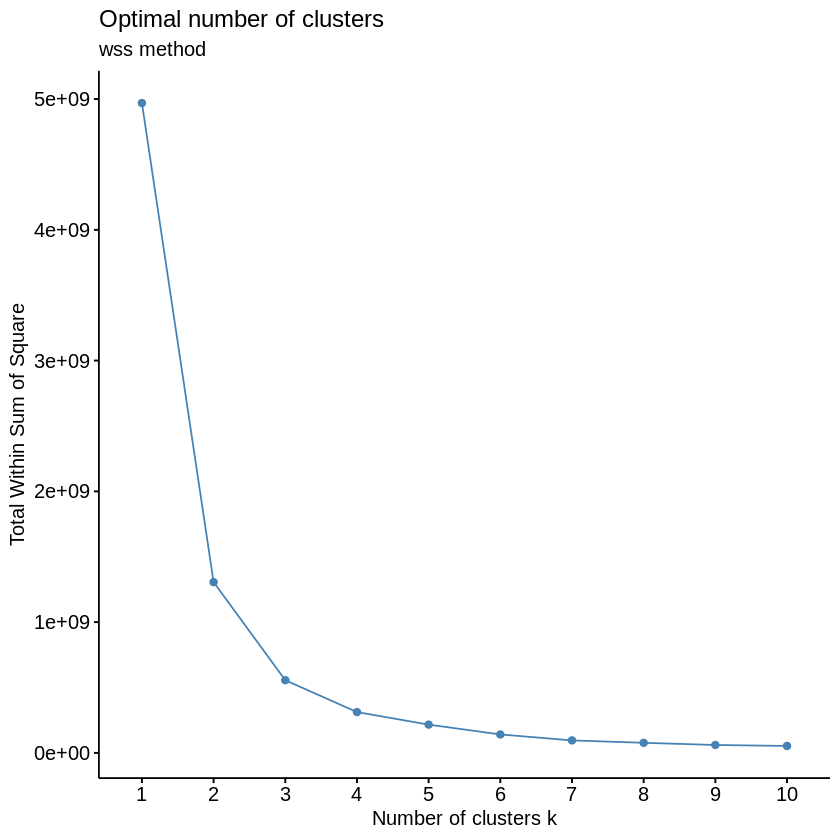

In [73]:
fviz_nbclust(df_elbow, kmeans, method = "wss") + labs(subtitle = "wss method")

#### [K-means clustering](https://academy.dqlab.id/main/livecode/378/872/4889?pr=0)

In [74]:
set.seed(010597, sample.kind = "Rounding")

Warning message in set.seed(10597, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


In [75]:
kmeans_mm <- kmeans(df_elbow[,c("mm_frequency","mm_monetary")], centers = 3, iter.max = 20)

kmeans_mm$size

[1] 517  47  64

#### [Profiling - 1](https://academy.dqlab.id/main/livecode/378/872/4890?pr=0)

In [76]:
cust_fm_mm <- cbind(df_feature[,c("customer_code", "recency", "recency_segment", "frequency", "monetary")], fm_segment=kmeans_mm$cluster) %>%
mutate(fm_segment=as_factor(fm_segment))

In [78]:
head(cust_fm_mm)

,customer_code,recency,recency_segment,frequency,monetary,fm_segment
,<fct>,<int>,<fct>,<int>,<dbl>,<fct>
1,1131500030,464,inactive,1,231818.20,1
2,1131500035,28,active,1,26836.36,1
3,1131500074,416,inactive,1,19227.27,1
4,1131500077,308,inactive,1,67927.27,1
5,1131500082,26,active,1,26836.36,1
6,1131500099,461,inactive,1,69545.46,1


In [79]:
segment_profile <- cust_fm_mm %>%
  group_by(fm_segment) %>% 
  summarise(
    total_customer = n(),
    total_monetary = sum(monetary),
    total_frequency = sum(frequency),
    min_frequency = min(frequency),
    max_frequency = max(frequency),
    avg_frequency = as.integer(median(frequency)),
    min_monetary = min(monetary),
    max_monetary = max(monetary),
    avg_monetary = median(monetary)
  )

In [81]:
segment_profile

fm_segment,total_customer,total_monetary,total_frequency,min_frequency,max_frequency,avg_frequency,min_monetary,max_monetary,avg_monetary
<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,517,32889141,668,1,4,1,9090.91,272727.3,44863.64
2,47,19425099,278,1,18,6,231818.20,798236.4,365213.66
3,64,6306268,489,5,18,7,9759.00,236240.8,69545.46


#### [Profiling - 2](https://academy.dqlab.id/main/livecode/378/872/4891?pr=0)

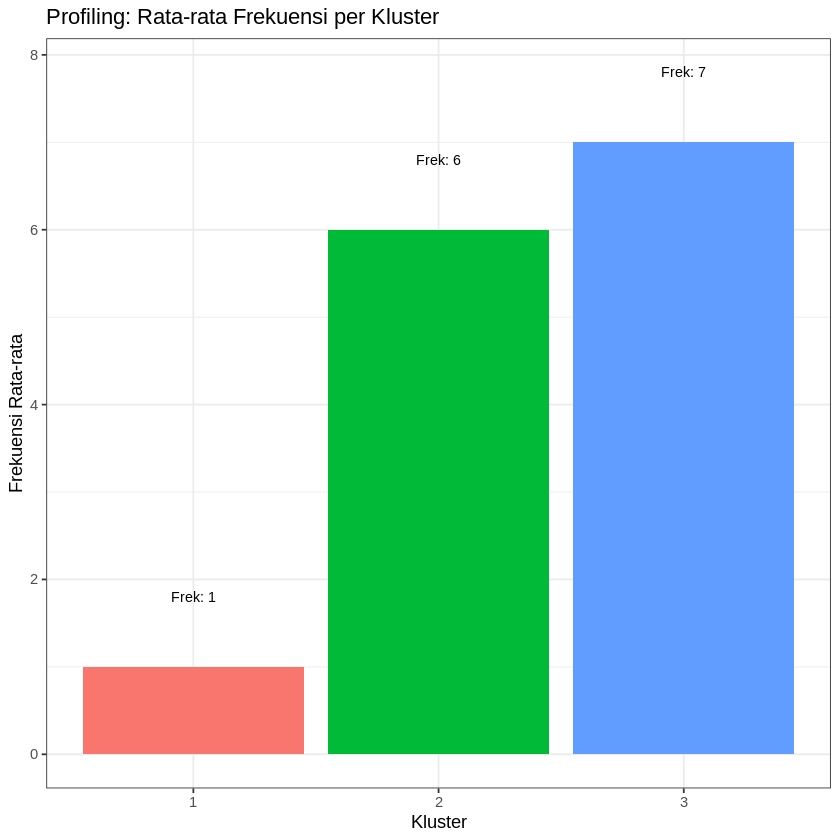

In [83]:
segment_profile %>%
ggplot(aes(fm_segment, avg_frequency)) +
  geom_bar(aes(fill = fm_segment), stat = "identity", show.legend = FALSE) +
  geom_text(aes(label = paste0('Frek: ', round(avg_frequency,0)), y = avg_frequency+0.8), size = 3, color = "black") +
  labs(
    title = "Profiling: Rata-rata Frekuensi per Kluster",
    x = "Kluster",
    y = "Frekuensi Rata-rata") +
theme_bw()

#### [Profiling - 3](https://academy.dqlab.id/main/livecode/378/872/4892?pr=0)

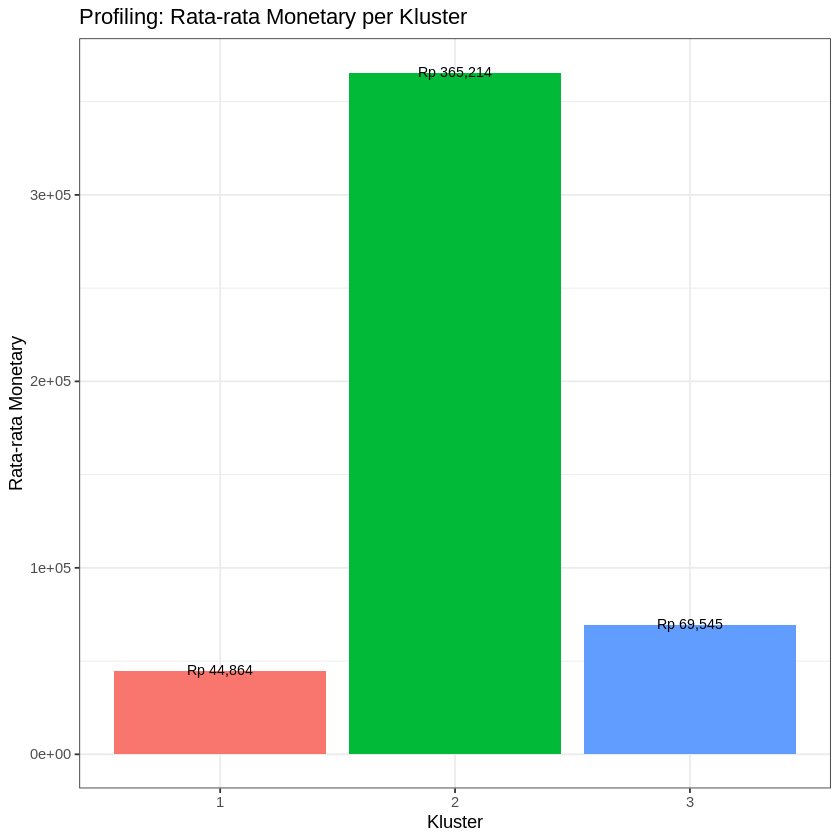

In [84]:
segment_profile %>%
ggplot(aes(fm_segment, avg_monetary)) +
  geom_bar(aes(fill = fm_segment), stat = "identity", show.legend = FALSE) +
  geom_text(aes(label = paste0("Rp ", comma(avg_monetary,1)), y = avg_monetary+500), size = 3, color = "black") +
  labs(
    title = "Profiling: Rata-rata Monetary per Kluster",
    x = "Kluster",
    y = "Rata-rata Monetary") +
theme_bw()

#### [Profiling - 4](https://academy.dqlab.id/main/livecode/378/872/4897?pr=0)

In [85]:
customer_segment <- cust_fm_mm %>% 
  mutate(
   fm_segment = case_when(fm_segment == "1" ~ "Low",
                        fm_segment == "2" ~ "High",
                        fm_segment == "3" ~ "Medium"),
   fm_segment = factor(fm_segment, levels=c("Low", "High", "Medium"))
   )

In [86]:
head(customer_segment,5)

,customer_code,recency,recency_segment,frequency,monetary,fm_segment
,<fct>,<int>,<fct>,<int>,<dbl>,<fct>
1,1131500030,464,inactive,1,231818.20,Low
2,1131500035,28,active,1,26836.36,Low
3,1131500074,416,inactive,1,19227.27,Low
4,1131500077,308,inactive,1,67927.27,Low
5,1131500082,26,active,1,26836.36,Low


#### [Show All](https://academy.dqlab.id/main/livecode/378/872/4893?pr=0)

In [89]:
df_segment_result <- df_feature %>%
  left_join(customer_segment %>%
            select(customer_code,fm_segment), by=c("customer_code"))

In [90]:
df_segment_result

customer_code,min_baskets,max_baskets,avg_baskets,frequency,buyer_province,first_order,last_order,min_amount_order,avg_amount_order,max_amount_order,age,recency,monetary,recency_segment,mm_frequency,mm_monetary,fm_segment
<fct>,<int>,<int>,<dbl>,<int>,<fct>,<date>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
1131500030,1,1,1,1,Jawa Timur,2020-03-24,2020-03-24,231818.20,231818.20,231818.20,464,464,231818.20,inactive,0.00000000,0.282238561,Low
1131500035,1,1,1,1,Jawa Barat,2021-06-03,2021-06-03,26836.36,26836.36,26836.36,28,28,26836.36,active,0.00000000,0.022486918,Low
1131500074,1,1,1,1,Jawa Barat,2020-05-11,2020-05-11,19227.27,19227.27,19227.27,416,416,19227.27,inactive,0.00000000,0.012844729,Low
1131500077,2,2,2,1,Jawa Timur,2020-08-27,2020-08-27,33309.09,33963.63,34618.18,308,308,67927.27,inactive,0.00000000,0.074557049,Low
1131500082,1,1,1,1,Jawa Barat,2021-06-05,2021-06-05,26836.36,26836.36,26836.36,26,26,26836.36,active,0.00000000,0.022486918,Low
1131500099,1,1,1,1,DKI Jakarta,2020-03-27,2020-03-27,69545.46,69545.46,69545.46,461,461,69545.46,inactive,0.00000000,0.076607609,Low
1131500128,1,1,1,1,Kalimantan Timur,2020-08-20,2020-08-20,421636.38,421636.38,421636.38,315,315,421636.38,inactive,0.00000000,0.522774913,High
1131500174,1,1,1,1,DKI Jakarta,2020-08-30,2020-08-30,22136.36,22136.36,22136.36,305,305,22136.36,inactive,0.00000000,0.016531109,Low
1131500187,1,1,1,1,Jawa Barat,2020-08-12,2020-08-12,29818.18,29818.18,29818.18,323,323,29818.18,inactive,0.00000000,0.026265461,Low


#### [Matrix RFM](https://academy.dqlab.id/main/livecode/378/872/4894?pr=0)

`summarise()` has grouped output by 'recency_segment'. You can override using
the `.groups` argument.


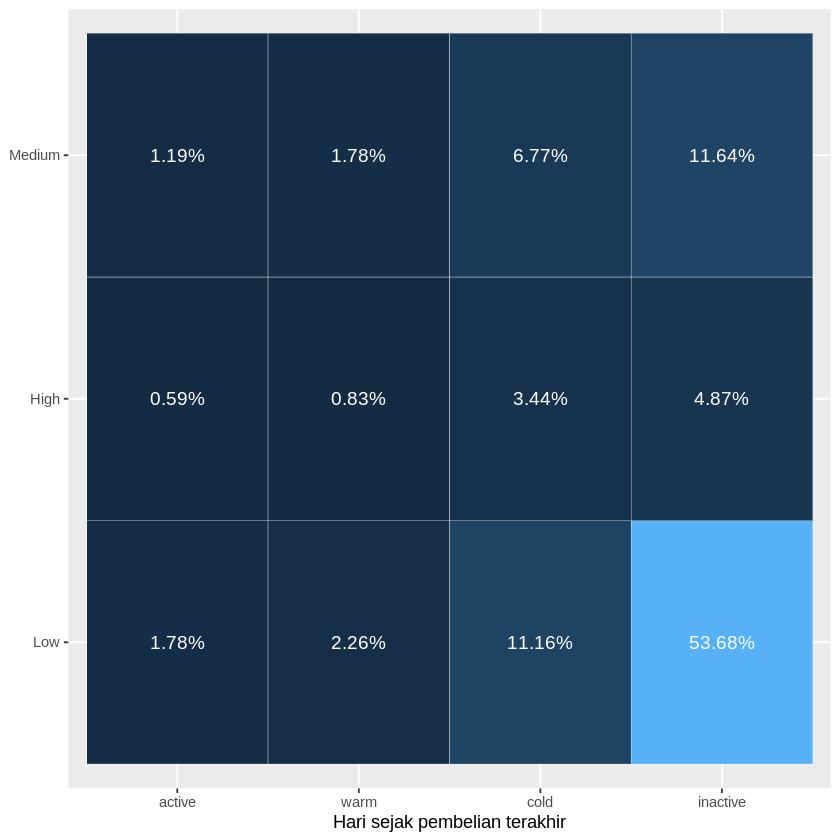

In [97]:
df_segment_result %>%
    group_by(recency_segment, fm_segment) %>%
    summarise(freq = n(),
              total_monetary = sum(monetary),
              avg_monetary = round(mean(monetary)),
              avg_frequency = median(frequency),
              avg_age = median(age),
              amount = freq * avg_monetary * avg_frequency) %>%
    ungroup() %>%    
    mutate(percent_freq = round((freq / sum(freq)) * 100, 2)) %>%
    ggplot(aes(recency_segment, fm_segment)) +
    geom_tile(aes(fill = percent_freq), colour = "white", show.legend = FALSE) +
    geom_text(aes(label = paste0(percent_freq, "%")), size = 4, color = "white", show.legend = FALSE) +
    labs(y = NULL,
         x = "Hari sejak pembelian terakhir") +
    theme(legend.title = element_text(size = 9),
          legend.position = "bottom")
